c:\Users\angel\anaconda3\envs\opencv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 165s 19ms/step - accuracy: 0.3601 - loss: 1.0919 - val_accuracy: 0.4020 - val_loss: 1.0581
Epoch 2/10
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 163s 20ms/step - accuracy: 0.4318 - loss: 1.0434 - val_accuracy: 0.4248 - val_loss: 1.0337
Epoch 3/10
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 164s 20ms/step - accuracy: 0.4453 - loss: 1.0294 - val_accuracy: 0.4243 - val_loss: 1.0240
Epoch 4/10
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 162s 20ms/step - accuracy: 0.4488 - loss: 1.0250 - val_accuracy: 0.4242 - val_loss: 1.0226
Epoch 5/10
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 165s 20ms/step - accuracy: 0.4490 - loss: 1.0237 - val_accuracy: 0.4181 - val_loss: 1.0314
Epoch 6/10
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 164s 20ms/step - accuracy: 0.4509 - loss: 1.0222 - va

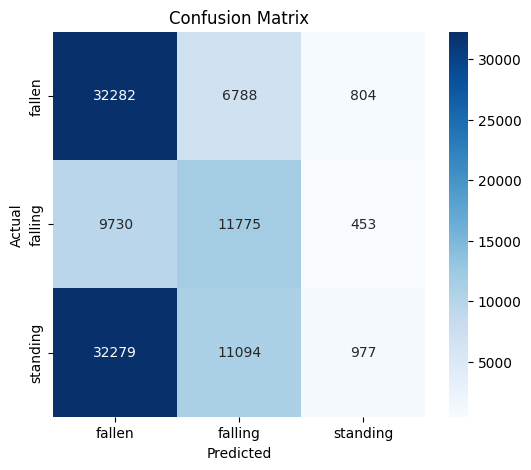

‚úÖ Ï†ïÌôïÎèÑ(Accuracy): 0.4241
‚úÖ Ïû¨ÌòÑÏú®(Recall): 0.4241


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = "preprocessed_data_relabeled.csv"
df = pd.read_csv(file_path)

# 2. ÌïôÏäµÏóê ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†ÌÉù (ÎÇôÏÉÅ Í∞êÏßÄÏôÄ Í¥ÄÎ†® ÏóÜÎäî Ïª¨Îüº Ï†úÏô∏)
# - `subject`: ÌîºÏã§ÌóòÏûê Ï†ïÎ≥¥ ‚Üí ÌïôÏäµ Ï†úÏô∏
# - `status`: ÎÇôÏÉÅ Ï¢ÖÎ•ò (Î¨∏ÏûêÏó¥) ‚Üí ÌïôÏäµ Ï†úÏô∏
# - `interval`: ÏãúÍ∞Ñ Ï†ïÎ≥¥ (Ïù¥ÎØ∏ ÏãúÍ≥ÑÏó¥ Ï†ÅÏö©Îê®) ‚Üí ÌïôÏäµ Ï†úÏô∏
# - `label`: 0(ÎÇôÏÉÅ), 1(ÎπÑÎÇôÏÉÅ) Íµ¨Î∂Ñ, Î≥¥Ï°∞Ïö©Ïù¥ÏßÄÎßå fall_stage ÏÇ¨Ïö©ÌïòÎØÄÎ°ú Ï†úÏô∏
categorical_columns = ['subject', 'status', 'interval', 'label']
numerical_columns = df.columns.difference(categorical_columns + ['fall_stage'])  # ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞

df_numerical = df[numerical_columns]  # ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù

# 3. ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî (Î™®Îì† ÏàòÏπòÌòï ÌîºÏ≤òÏóê Ï†ÅÏö©)
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# 4. `fall_stage` Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Label Encoding)
label_encoder = LabelEncoder()
df['fall_stage'] = label_encoder.fit_transform(df['fall_stage'])  # 'standing', 'falling', 'fallen' ‚Üí 0, 1, 2

# 5. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (feature, target)
X = df_numerical_scaled.values  # ÌäπÏßï Îç∞Ïù¥ÌÑ∞
y = df['fall_stage'].values  # ÌÉÄÍ≤ü ÎùºÎ≤®

# 6. Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 7. **SMOTE Ï†ÅÏö© (Train Îç∞Ïù¥ÌÑ∞ÏóêÎßå)**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 8. Îã§Ï§ë ÌÅ¥ÎûòÏä§ ÎùºÎ≤®ÏùÑ ÏúÑÌïú One-Hot Encoding
y_train_resampled_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# 9. CNN+LSTM Î™®Îç∏ Íµ¨ÏÑ± (ÎÇôÏÉÅ Í∞êÏßÄ ÏµúÏ†ÅÌôî)
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)), 
    Dropout(0.2),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(y_train_resampled_categorical.shape[1], activation='softmax')  # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
])

# 10. Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌïôÏäµ (Ï°∞Í∏∞ Ï¢ÖÎ£å Ï∂îÍ∞Ä)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_resampled, y_train_resampled_categorical, 
                    validation_data=(X_test, y_test_categorical), 
                    epochs=10, batch_size=64, verbose=1, callbacks=[early_stopping])

# 11. Î™®Îç∏ ÌèâÍ∞Ä
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

# 12. Confusion Matrix ÏãúÍ∞ÅÌôî
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 13. Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}")
print(f"‚úÖ Ïû¨ÌòÑÏú®(Recall): {recall:.4f}")


In [15]:
df.columns

Index(['Unnamed: 0', 'subject', 'label', 'status', 'fall_stage', 'interval',
       'ax_kurtosis', 'ax_spectral_entropy', 'ax_time_energy',
       'ax_activity_count', 'ay_kurtosis', 'ay_spectral_entropy',
       'ay_time_energy', 'ay_activity_count', 'az_kurtosis',
       'az_spectral_entropy', 'az_time_energy', 'az_activity_count', 'BPM',
       'NN50', 'RMSSD', 'SDSD', 'w_mean', 'w_median', 'w_std', 'w_mad',
       'w_skew', 'x_mean', 'x_median', 'x_std', 'x_mad', 'x_skew', 'y_mean',
       'y_median', 'y_std', 'y_mad', 'y_skew', 'z_mean', 'z_median', 'z_std',
       'z_mad', 'z_skew', 'ax_mean', 'ax_median', 'ax_std', 'ax_mad',
       'ax_skew', 'ay_mean', 'ay_median', 'ay_std', 'ay_mad', 'ay_skew',
       'az_mean', 'az_median', 'az_std', 'az_mad', 'az_skew'],
      dtype='object')

c:\Users\angel\anaconda3\envs\opencv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
4158/4158 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 106s 24ms/step - accuracy: 0.3468 - loss: 1.0970 - val_accuracy: 0.3648 - val_loss: 1.0825
Epoch 2/8
4158/4158 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95s 23ms/step - accuracy: 0.3944 - loss: 1.0759 - val_accuracy: 0.4113 - val_loss: 1.0591
Epoch 3/8
4158/4158 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 97s 23ms/step - accuracy: 0.4158 - loss: 1.0576 - val_accuracy: 0.4141 - val_loss: 1.0562
Epoch 4/8
4158/4158 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 24ms/step - accuracy: 0.4238 - loss: 1.0499 - val_accuracy: 0.4133 - val_loss: 1.0545
Epoch 5/8
4158/4158 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95s 23ms/step - accuracy: 0.4291 - loss: 1.0440 - val_accuracy: 0.4202 - val_loss: 1.0390
Epoch 6/8
4158/4158 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98s 24ms/step - accuracy: 0.4334 - loss: 1.0410 - val_accuracy

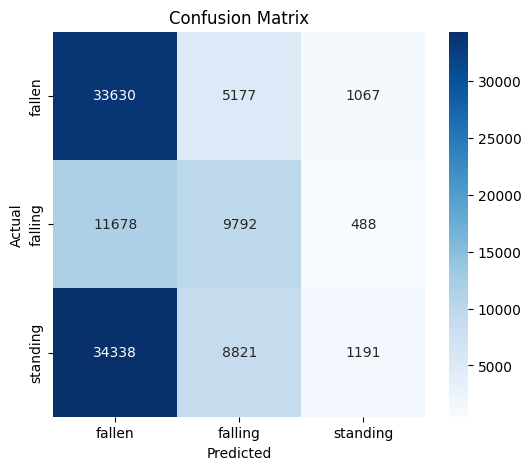

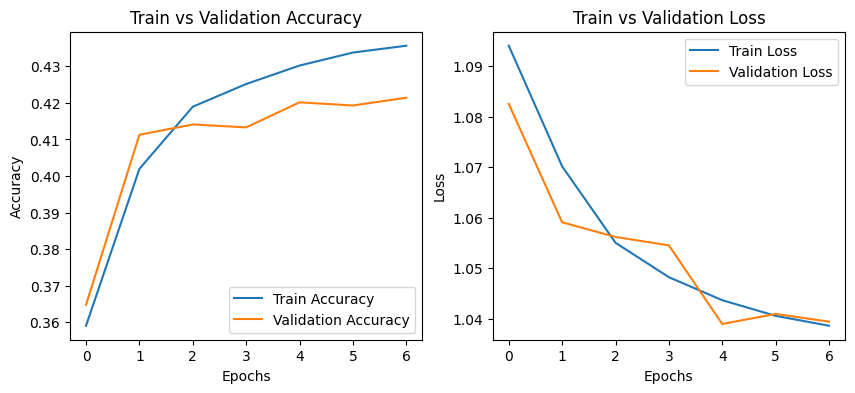

‚úÖ Ï†ïÌôïÎèÑ(Accuracy): 0.4202
‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): 0.4459


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = "preprocessed_data_relabeled.csv"
df = pd.read_csv(file_path)
df = df[df['status'].str.contains('fall')]

# ÌïôÏäµÏóê ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†ÌÉù (Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÏô∏)
categorical_columns = ['subject', 'status', 'interval', 'label']
numerical_columns = df.columns.difference(categorical_columns + ['fall_stage'])

df_numerical = df[numerical_columns]

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# `fall_stage` Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Label Encoding)
label_encoder = LabelEncoder()
df['fall_stage'] = label_encoder.fit_transform(df['fall_stage'])

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (feature, target)
X = df_numerical_scaled.values  # ÌäπÏßï Îç∞Ïù¥ÌÑ∞
y = df['fall_stage'].values  # ÌÉÄÍ≤ü ÎùºÎ≤®

# Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **SMOTE Ï†ÅÏö© (Train Îç∞Ïù¥ÌÑ∞ÏóêÎßå)**
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Îã§Ï§ë ÌÅ¥ÎûòÏä§ ÎùºÎ≤®ÏùÑ ÏúÑÌïú One-Hot Encoding
y_train_resampled_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# **CNN+LSTM Î™®Îç∏ Íµ¨ÏÑ± (ÌïôÏäµ ÏÜçÎèÑ ÏµúÏ†ÅÌôî)**
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),  # ÌïÑÌÑ∞ Ïàò Í∞êÏÜå
    Dropout(0.2),
    LSTM(16, return_sequences=True),  # LSTM ÎÖ∏Îìú Í∞úÏàò Í∞êÏÜå
    LSTM(8),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(y_train_resampled_categorical.shape[1], activation='softmax')  # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
])

# Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌïôÏäµ (Ï°∞Í∏∞ Ï¢ÖÎ£å Ï∂îÍ∞Ä)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)  # patience Í∞êÏÜå

history = model.fit(X_train_resampled, y_train_resampled_categorical, 
                    validation_data=(X_test, y_test_categorical), 
                    epochs=8, batch_size=128, verbose=1, callbacks=[early_stopping])  # Î∞∞Ïπò ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä, ÏóêÌè¨ÌÅ¨ Í∞êÏÜå

# Î™®Îç∏ ÌèâÍ∞Ä
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall) Í≥ÑÏÇ∞
falling_index = list(label_encoder.classes_).index('falling')  # 'falling' ÌÅ¥ÎûòÏä§Ïùò Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
falling_recall = recall_score(y_true_classes, y_pred_classes, labels=[falling_index], average='weighted')

# Confusion Matrix ÏãúÍ∞ÅÌôî
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù ÏÜêÏã§(loss) Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}")
print(f"‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): {falling_recall:.4f}")


Epoch 1/10


c:\Users\angel\anaconda3\envs\opencv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4018/4018 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 101s 24ms/step - accuracy: 0.3746 - loss: 1.0859 - val_accuracy: 0.4267 - val_loss: 1.0410
Epoch 2/10
4018/4018 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99s 25ms/step - accuracy: 0.4193 - loss: 1.0470 - val_accuracy: 0.4311 - val_loss: 1.0305
Epoch 3/10
4018/4018 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 101s 25ms/step - accuracy: 0.4308 - loss: 1.0323 - val_accuracy: 0.4259 - val_loss: 1.0314
Epoch 4/10
4018/4018 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107s 27ms/step - accuracy: 0.4341 - loss: 1.0284 - val_accuracy: 0.4288 - val_loss: 1.0285
Epoch 5/10
4018/4018 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 103s 26ms/step - accuracy: 0.4384 - loss: 1.0248 - val_accuracy: 0.4304 - val_loss: 1.0240
Epoch 6/10
4018/4018 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 108s 27ms/step - accuracy: 0.4387 - loss: 1.0229 - val_accuracy: 

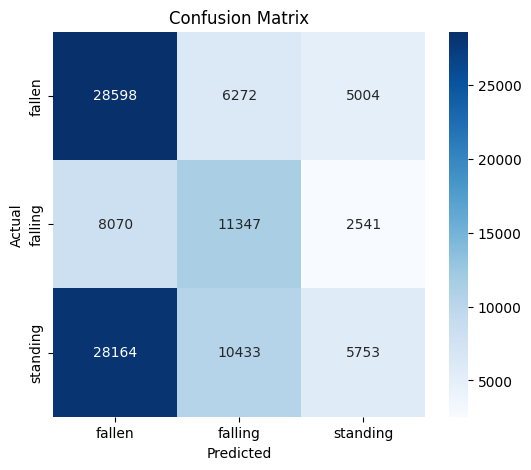

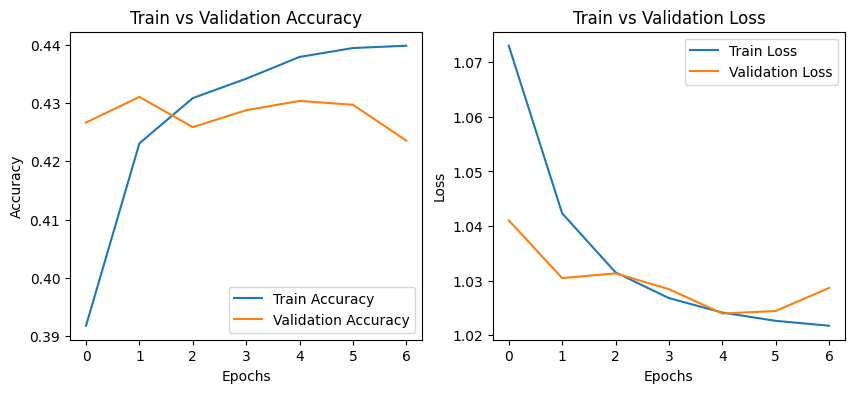

‚úÖ Ï†ïÌôïÎèÑ(Accuracy): 0.4304
‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): 0.5168

üîç Classification Report:
               precision    recall  f1-score   support

      fallen       0.44      0.72      0.55     39874
     falling       0.40      0.52      0.45     21958
    standing       0.43      0.13      0.20     44350

    accuracy                           0.43    106182
   macro avg       0.43      0.45      0.40    106182
weighted avg       0.43      0.43      0.38    106182



In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = "preprocessed_data_relabeled.csv"
df = pd.read_csv(file_path)

# 2. ÌïôÏäµÏóê ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†ÌÉù (Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞)
categorical_columns = ['subject', 'status', 'interval', 'label']
numerical_columns = df.columns.difference(categorical_columns + ['fall_stage'])

df_numerical = df[numerical_columns]

# 3. ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# 4. `fall_stage` Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Label Encoding)
label_encoder = LabelEncoder()
df['fall_stage'] = label_encoder.fit_transform(df['fall_stage'])

# 5. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (feature, target)
X = df_numerical_scaled.values
y = df['fall_stage'].values

# 6. Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 7. **falling ÌÅ¥ÎûòÏä§Îßå Oversampling Ï†ÅÏö©**
falling_index = list(label_encoder.classes_).index('falling')
oversampler = RandomOverSampler(sampling_strategy={falling_index: int(np.max(np.bincount(y_train)))}, random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# 8. One-Hot Encoding
y_train_resampled_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# 9. CNN+LSTM Î™®Îç∏ Íµ¨ÏÑ± (ÏµúÏ†ÅÌôî Î≤ÑÏ†Ñ)
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)), 
    BatchNormalization(),
    Dropout(0.3),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y_train_resampled_categorical.shape[1], activation='softmax')  # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
])

# 10. Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌïôÏäµ (Ï°∞Í∏∞ Ï¢ÖÎ£å Ï∂îÍ∞Ä)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train_resampled, y_train_resampled_categorical, 
                    validation_data=(X_test, y_test_categorical), 
                    epochs=10, batch_size=128, verbose=1, callbacks=[early_stopping])

# 11. Î™®Îç∏ ÌèâÍ∞Ä
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall) Í≥ÑÏÇ∞
falling_recall = recall_score(y_true_classes, y_pred_classes, labels=[falling_index], average='weighted')

# Confusion Matrix ÏãúÍ∞ÅÌôî
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ & ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}")
print(f"‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): {falling_recall:.4f}")
print("\nüîç Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


In [3]:
features = ['ax_kurtosis', 'ax_spectral_entropy',
   'ax_time_energy', 'ax_activity_count', 'ay_kurtosis',
   'ay_spectral_entropy', 'ay_time_energy', 'ay_activity_count',
   'az_kurtosis', 'az_spectral_entropy', 'az_time_energy',
   'az_activity_count', 'BPM', 'NN50', 'RMSSD', 'SDSD', 'w_mean',
   'w_median', 'w_std', 'w_mad', 'w_skew', 'x_mean', 'x_median', 'x_std',
   'x_mad', 'x_skew', 'y_mean', 'y_median', 'y_std', 'y_mad', 'y_skew',
   'z_mean', 'z_median', 'z_std', 'z_mad', 'z_skew', 'ax_mean',
   'ax_median', 'ax_std', 'ax_mad', 'ax_skew', 'ay_mean', 'ay_median',
   'ay_std', 'ay_mad', 'ay_skew', 'az_mean', 'az_median', 'az_std',
   'az_mad', 'az_skew','label']
# Compute correlation matrix
correlation_matrix = df[features].corr()
# labelÍ≥ºÏùò Ï†àÎåÄ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞íÏù¥ Í∞ÄÏû• ÌÅ∞ 10Í∞ú feature ÏÑ†ÌÉù
top_10_correlated_features = correlation_matrix['label'].abs().sort_values(ascending=False).iloc[1:11]

# Í≤∞Í≥º Ï∂úÎ†•
print(top_10_correlated_features)


ax_spectral_entropy   NaN
ax_time_energy        NaN
ax_activity_count     NaN
ay_kurtosis           NaN
ay_spectral_entropy   NaN
ay_time_energy        NaN
ay_activity_count     NaN
az_kurtosis           NaN
az_spectral_entropy   NaN
az_time_energy        NaN
Name: label, dtype: float64

In [4]:
print(top_10_correlated_features)

ax_spectral_entropy   NaN
ax_time_energy        NaN
ax_activity_count     NaN
ay_kurtosis           NaN
ay_spectral_entropy   NaN
ay_time_energy        NaN
ay_activity_count     NaN
az_kurtosis           NaN
az_spectral_entropy   NaN
az_time_energy        NaN
Name: label, dtype: float64


üîç ÏÑ†ÌÉùÎêú Feature: ['RMSSD' 'ax_kurtosis' 'ax_mean' 'ax_median' 'ax_time_energy' 'ay_mean'
 'ay_median' 'ay_time_energy' 'az_kurtosis' 'w_mean' 'w_median' 'x_mean'
 'x_median' 'x_skew' 'y_mean' 'y_median' 'y_std' 'z_mad' 'z_mean'
 'z_median']
Epoch 1/20


c:\Users\angel\anaconda3\envs\opencv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8036/8036 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 91s 11ms/step - accuracy: 0.3917 - loss: 1.0710 - val_accuracy: 0.4206 - val_loss: 1.0341
Epoch 2/20
8036/8036 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86s 11ms/step - accuracy: 0.4362 - loss: 1.0264 - val_accuracy: 0.4289 - val_loss: 1.0278
Epoch 3/20
8036/8036 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 10ms/step - accuracy: 0.4408 - loss: 1.0206 - val_accuracy: 0.4156 - val_loss: 1.0368
Epoch 4/20
8036/8036 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84s 10ms/step - accuracy: 0.4423 - loss: 1.0190 - val_accuracy: 0.4192 - val_loss: 1.0293
3319/3319 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 3ms/step


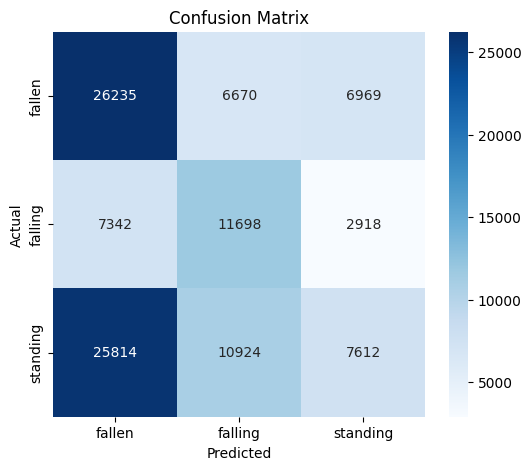

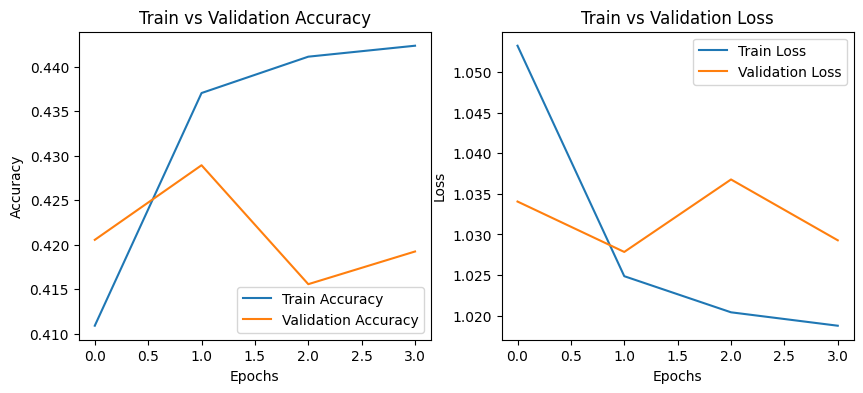

‚úÖ Ï†ïÌôïÎèÑ(Accuracy): 0.4289
‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): 0.5327

üîç Classification Report:
               precision    recall  f1-score   support

      fallen       0.44      0.66      0.53     39874
     falling       0.40      0.53      0.46     21958
    standing       0.43      0.17      0.25     44350

    accuracy                           0.43    106182
   macro avg       0.43      0.45      0.41    106182
weighted avg       0.43      0.43      0.40    106182



In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = "preprocessed_data_relabeled.csv"
df = pd.read_csv(file_path)
df.drop(columns='Unnamed: 0', inplace=True)
df = df[df['status'].str.contains('fall')]

# 2. ÌïôÏäµÏóê ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†ÌÉù (Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞)
categorical_columns = ['subject', 'status', 'interval', 'label']
numerical_columns = df.columns.difference(categorical_columns + ['fall_stage'])
df_numerical = df[numerical_columns]


# 3. ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# 4. `fall_stage` Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Label Encoding)
label_encoder = LabelEncoder()
df['fall_stage'] = label_encoder.fit_transform(df['fall_stage'].astype(str))

# 5. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (feature, target)
X = df_numerical_scaled.values
y = df['fall_stage'].values

# 6. Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 7. **Feature Importance Í∏∞Î∞ò ÏÑ†ÌÉù (Random Forest ÏÇ¨Ïö©)**
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ Feature ÏÑ†ÌÉù
selector = SelectFromModel(rf, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# ÏÑ†ÌÉùÎêú Feature ÌôïÏù∏
selected_features = np.array(numerical_columns)[selector.get_support()]
print(f"üîç ÏÑ†ÌÉùÎêú Feature: {selected_features}")

# 8. **falling ÌÅ¥ÎûòÏä§Îßå Oversampling Ï†ÅÏö©**
if falling_index in y_train:
    oversampler = RandomOverSampler(sampling_strategy={falling_index: int(np.max(np.bincount(y_train)))}, random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_selected, y_train)
else:
    X_train_resampled, y_train_resampled = X_train_selected, y_train


# 9. One-Hot Encoding
y_train_resampled_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# 10. CNN+LSTM Î™®Îç∏ Íµ¨ÏÑ± (ÏµúÏ†ÅÌôî Î≤ÑÏ†Ñ)
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)), 
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y_train_resampled_categorical.shape[1], activation='softmax')  # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
])

# 11. Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌïôÏäµ (Ï°∞Í∏∞ Ï¢ÖÎ£å Ï∂îÍ∞Ä)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train_resampled, y_train_resampled_categorical, 
                    validation_data=(X_test_selected, y_test_categorical), 
                    epochs=20, batch_size=64, verbose=1, callbacks=[early_stopping])

# 12. Î™®Îç∏ ÌèâÍ∞Ä
y_pred = model.predict(X_test_selected)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall) Í≥ÑÏÇ∞
falling_recall = recall_score(y_true_classes, y_pred_classes, labels=[falling_index], average='weighted')

# Confusion Matrix ÏãúÍ∞ÅÌôî
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ & ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}")
print(f"‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): {falling_recall:.4f}")
print("\nüîç Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

Epoch 1/20


c:\Users\angel\anaconda3\envs\opencv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6637/6637 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 162s 24ms/step - accuracy: 0.4189 - loss: 1.0477 - val_accuracy: 0.4378 - val_loss: 1.0037
Epoch 2/20
6637/6637 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 160s 24ms/step - accuracy: 0.4363 - loss: 1.0061 - val_accuracy: 0.4442 - val_loss: 0.9933
Epoch 3/20
6637/6637 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 159s 24ms/step - accuracy: 0.4409 - loss: 0.9964 - val_accuracy: 0.4456 - val_loss: 0.9929
Epoch 4/20
6637/6637 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 162s 24ms/step - accuracy: 0.4416 - loss: 0.9949 - val_accuracy: 0.4421 - val_loss: 0.9899
Epoch 5/20
6637/6637 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 163s 24ms/step - accuracy: 0.4448 - loss: 0.9934 - val_accuracy: 0.4484 - val_loss: 0.9874
Epoch 6/20
6637/6637 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 163s 25ms/step - accuracy: 0.4441 - loss: 0.9926 - val_accuracy:

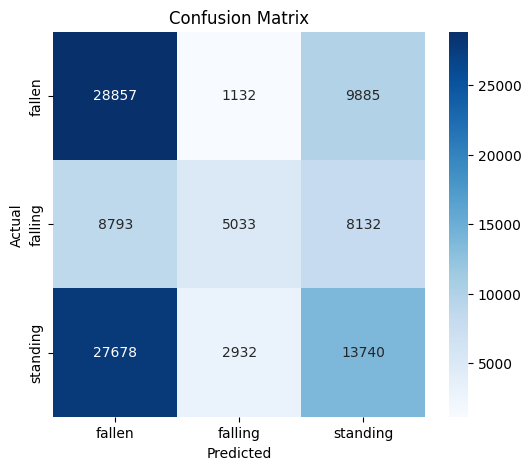

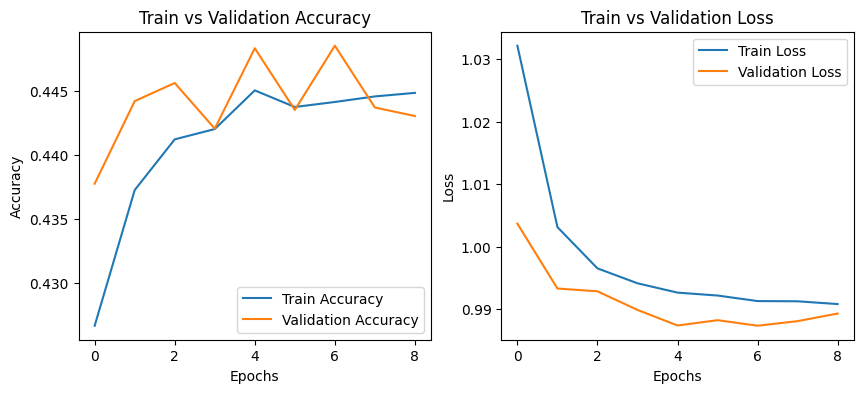

‚úÖ Ï†ïÌôïÎèÑ(Accuracy): 0.4486
‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): 0.2292

üîç Classification Report:
               precision    recall  f1-score   support

      fallen       0.44      0.72      0.55     39874
     falling       0.55      0.23      0.32     21958
    standing       0.43      0.31      0.36     44350

    accuracy                           0.45    106182
   macro avg       0.48      0.42      0.41    106182
weighted avg       0.46      0.45      0.42    106182



In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = "preprocessed_data_relabeled.csv"
df = pd.read_csv(file_path)
df.drop(columns='Unnamed: 0', inplace=True)
df = df[df['status'].str.contains('fall')]

# 2. ÌïôÏäµÏóê ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†ÌÉù (Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞)
categorical_columns = ['subject', 'status', 'interval', 'label']
numerical_columns = df.columns.difference(categorical_columns + ['fall_stage'])
df_numerical = df[numerical_columns]


# 3. ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# 4. `fall_stage` Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Label Encoding)
label_encoder = LabelEncoder()
df['fall_stage'] = label_encoder.fit_transform(df['fall_stage'].astype(str))

# 5. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (feature, target)
X = df_numerical_scaled.values
y = df['fall_stage'].values

# 6. Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 9. One-Hot Encoding
y_train_resampled_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# 10. CNN+LSTM Î™®Îç∏ Íµ¨ÏÑ± (ÏµúÏ†ÅÌôî Î≤ÑÏ†Ñ)
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)), 
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(y_train_resampled_categorical.shape[1], activation='softmax')  # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò
])

# 11. Î™®Îç∏ Ïª¥ÌååÏùº Î∞è ÌïôÏäµ (Ï°∞Í∏∞ Ï¢ÖÎ£å Ï∂îÍ∞Ä)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train_resampled_categorical, 
                    validation_data=(X_test, y_test_categorical), 
                    epochs=20, batch_size=64, verbose=1, callbacks=[early_stopping])

# 12. Î™®Îç∏ ÌèâÍ∞Ä
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall) Í≥ÑÏÇ∞
falling_recall = recall_score(y_true_classes, y_pred_classes, labels=[falling_index], average='weighted')

# Confusion Matrix ÏãúÍ∞ÅÌôî
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ & ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}")
print(f"‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): {falling_recall:.4f}")
print("\nüîç Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

üîç ÏÑ†ÌÉùÎêú Feature: ['RMSSD' 'ax_kurtosis' 'ax_mean' 'ax_median' 'ax_time_energy' 'ay_mean'
 'ay_median' 'ay_time_energy' 'az_kurtosis' 'w_mean' 'w_median' 'x_mean'
 'x_median' 'x_skew' 'y_mean' 'y_median' 'y_std' 'z_mad' 'z_mean'
 'z_median']
Epoch 1/25


c:\Users\angel\anaconda3\envs\opencv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 180s 21ms/step - accuracy: 0.4072 - loss: 1.0635 - val_accuracy: 0.4290 - val_loss: 1.0253
Epoch 2/25
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 177s 21ms/step - accuracy: 0.4470 - loss: 1.0248 - val_accuracy: 0.4238 - val_loss: 1.0270
Epoch 3/25
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 177s 21ms/step - accuracy: 0.4522 - loss: 1.0195 - val_accuracy: 0.4183 - val_loss: 1.0271
Epoch 4/25
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179s 21ms/step - accuracy: 0.4540 - loss: 1.0170 - val_accuracy: 0.4258 - val_loss: 1.0221
Epoch 5/25
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179s 22ms/step - accuracy: 0.4548 - loss: 1.0163 - val_accuracy: 0.4258 - val_loss: 1.0229
Epoch 6/25
8316/8316 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 177s 21ms/step - accuracy: 0.4541 - loss: 1.0165 - val_accuracy:

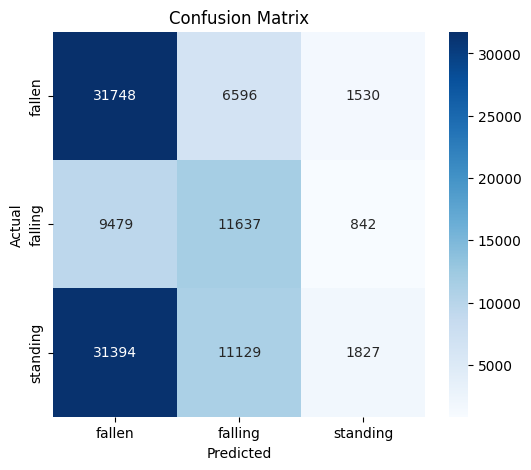

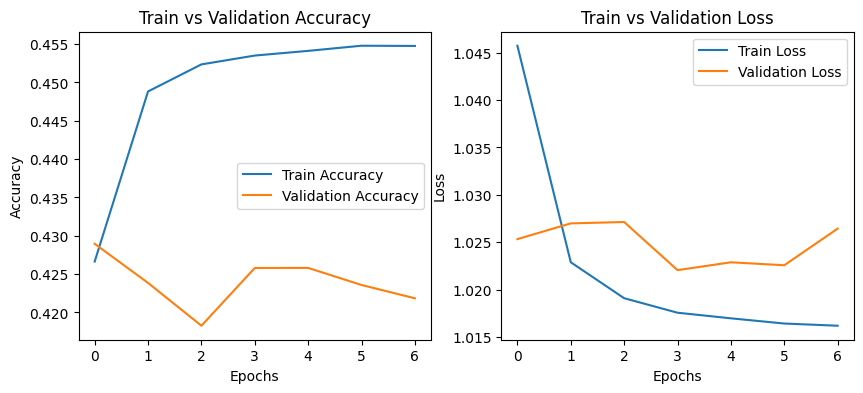

‚úÖ Ï†ïÌôïÎèÑ(Accuracy): 0.4258
‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): 0.5300

üîç Classification Report:
               precision    recall  f1-score   support

      fallen       0.44      0.80      0.56     39874
     falling       0.40      0.53      0.45     21958
    standing       0.44      0.04      0.08     44350

    accuracy                           0.43    106182
   macro avg       0.42      0.46      0.36    106182
weighted avg       0.43      0.43      0.34    106182



In [11]:
from imblearn.over_sampling import SMOTE

# 7. Feature Selection (Random Forest)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = np.array(numerical_columns)[selector.get_support()]
print(f"üîç ÏÑ†ÌÉùÎêú Feature: {selected_features}")

# 8. SMOTE Ï†ÅÏö© (Oversampling)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# 9. One-Hot Encoding
y_train_resampled_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# CNN+LSTM Î™®Îç∏ Í∞úÏÑ†
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)), 
    BatchNormalization(),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train_resampled_categorical.shape[1], activation='softmax')
])

# Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä ÌïôÏäµÎ•† Ï°∞Ï†ï
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Ï°∞Í∏∞ Ï¢ÖÎ£å Ï∂îÍ∞Ä
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(X_train_resampled, y_train_resampled_categorical, 
                    validation_data=(X_test_selected, y_test_categorical), 
                    epochs=25, batch_size=64, verbose=1, callbacks=[early_stopping])

# Î™®Îç∏ ÌèâÍ∞Ä
y_pred = model.predict(X_test_selected)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
falling_recall = recall_score(y_true_classes, y_pred_classes, labels=[falling_index], average='weighted')

# Confusion Matrix ÏãúÍ∞ÅÌôî
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ & ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}")
print(f"‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): {falling_recall:.4f}")
print("\nüîç Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))
